Observations 
1) It appears that ramicane and capomulin were the most effective treatments at shrinking tumor growth. This is most apparent when looking at the four most promising treatment's boxplots on the same chart. The median tumor size for ramicane and capomulin were significantly lower than the others. These two treatments also had the smallest standard devition.

2) Capomulin showed significant tumor shrinking over time. In the line graph of timepoint vs. tumor size for this treatment for one mouse the tumor is seen to shrink to almost half its original size. 

3) The relationship between the weight and the average tumor volume is somewhat linear. The r squared value is around 0.7 which suggests a linear correlation though not a very strong one.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

In [2]:
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [109]:
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")


In [5]:
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [108]:
duplicate_mice=combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

clean_data=combined_data[combined_data["Mouse ID"].isin(duplicate_mice) == False]


In [7]:
mean=clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

variance=clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev=clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM=clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [8]:
summary_stats={
    "Mean": mean, 
    "Median": median,
    "Variance": variance,
    "Standard Deviation": stdev,
    "SEM": SEM
}
summary_stats_df=pd.DataFrame(summary_stats)
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


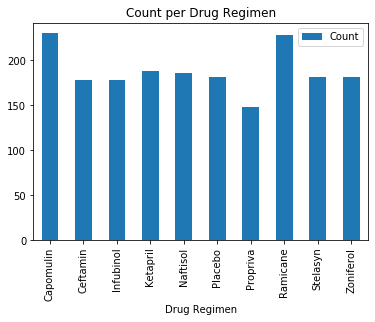

<Figure size 432x288 with 0 Axes>

In [99]:
grouped=clean_data.groupby(["Drug Regimen"]).count().reset_index()
grouped=grouped[["Drug Regimen", "Mouse ID"]]
grouped=grouped.rename(columns={"Mouse ID": "Count"})
#grouped=grouped.set_index("Drug Regimen")
grouped.plot(kind="bar", x="Drug Regimen")
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

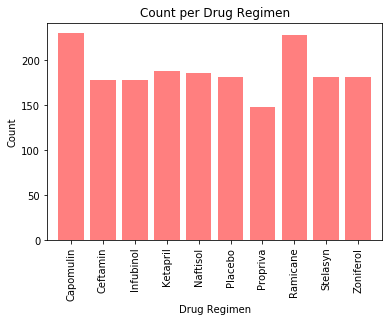

In [107]:
drugs=grouped["Drug Regimen"]
count=grouped["Count"]
x_axis=np.arange(len(count))
plt.bar(x_axis, count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()

In [11]:
gender_df = pd.DataFrame(clean_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [12]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,922
1,Male,958


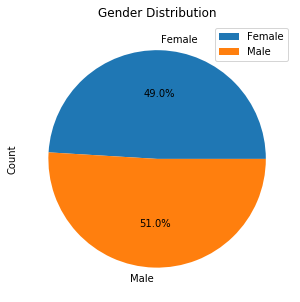

In [36]:

plot_pie = gender_df.plot.pie(y='Count', figsize=(5, 5), labels=gender_df['Sex'], autopct='%1.1f%%', title="Gender Distribution")

([<matplotlib.patches.Wedge at 0x1a21e2d890>,
 [Text(-1.0995024239828841, 0.03308201408261592, 'Female'),
  Text(1.0995024239828841, -0.03308201408261557, 'Male')],
 [Text(-0.5997285948997548, 0.018044734954154134, '49.0%'),
  Text(0.5997285948997549, -0.018044734954153943, '51.0%')])

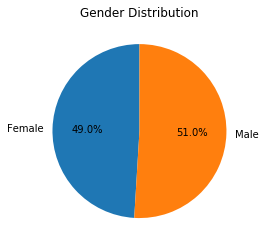

In [35]:
gender=gender_df["Sex"]
count=gender_df["Count"]
fig1, ax1 = plt.subplots()
plt.title("Gender Distribution")
ax1.pie(count, labels=gender, autopct='%1.1f%%', startangle=90)

In [15]:
#find out last timepoint
ascending_clean=clean_data.sort_values("Timepoint", ascending=False)
ascending_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
874,g296,Zoniferol,Female,14,29,45,68.163195,4
884,g497,Ketapril,Male,19,28,45,69.872251,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
1170,m269,Stelasyn,Female,22,28,0,45.000000,0
1164,m133,Naftisol,Female,2,26,0,45.000000,0
1163,l872,Placebo,Male,19,30,0,45.000000,0
1153,l733,Ceftamin,Female,4,30,0,45.000000,0


In [16]:
last_timepoint=clean_data.loc[clean_data["Timepoint"]==45]
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
capomulin=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Capomulin"]
capomulin=capomulin["Tumor Volume (mm3)"]
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


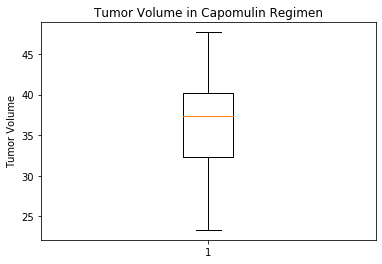

In [34]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(capomulin)
plt.show()

In [21]:
Ramicane=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Ramicane"]
Ramicane=Ramicane["Tumor Volume (mm3)"]
quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


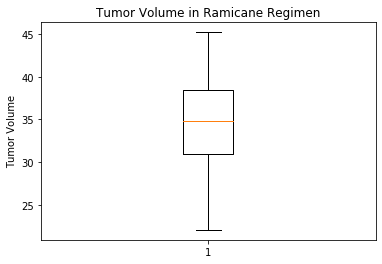

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Ramicane)
plt.show()

In [23]:
Infubinol=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Infubinol"]
Infubinol=Infubinol["Tumor Volume (mm3)"]
quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


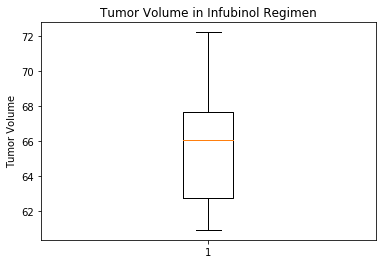

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Infubinol)
plt.show()

In [25]:
Ceftamin=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Ceftamin"]
Ceftamin=Ceftamin["Tumor Volume (mm3)"]
quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


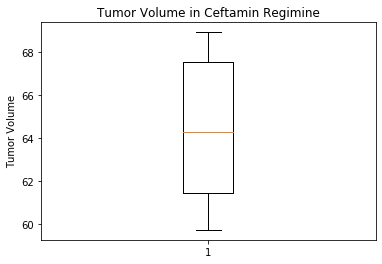

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Ceftamin)
plt.show()

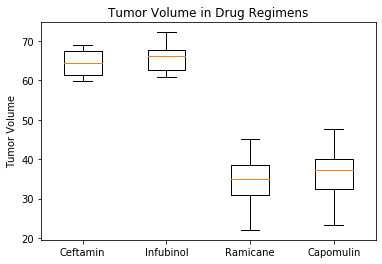

In [31]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume in Drug Regimens')
ax1.set_ylabel('Tumor Volume')
plt.boxplot([Ceftamin, Infubinol, Ramicane, capomulin])
plt.xticks([1, 2, 3, 4], ["Ceftamin", "Infubinol", "Ramicane", "Capomulin"])
plt.show()

In [44]:
Capomulin_only=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]


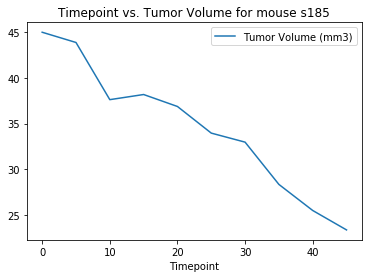

In [43]:
mouse_s185=Capomulin_only.loc[Capomulin_only["Mouse ID"]=="s185"]
mouse_s185=mouse_s185.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
mouse_s185
mouse_s185.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", 
                title="Timepoint vs. Tumor Volume for mouse s185", )

In [50]:
Capomulin_only_reduced=Capomulin_only[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin_only_reduced

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


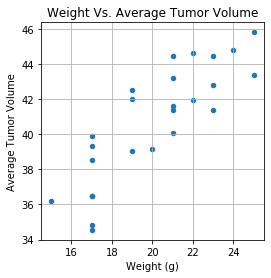

In [66]:
average_tumor=pd.DataFrame(Capomulin_only_reduced.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_tumor=average_tumor.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
average_tumor
average_tumor=average_tumor.set_index('Mouse ID')
average_tumor.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")

The linear regression model has the equation y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


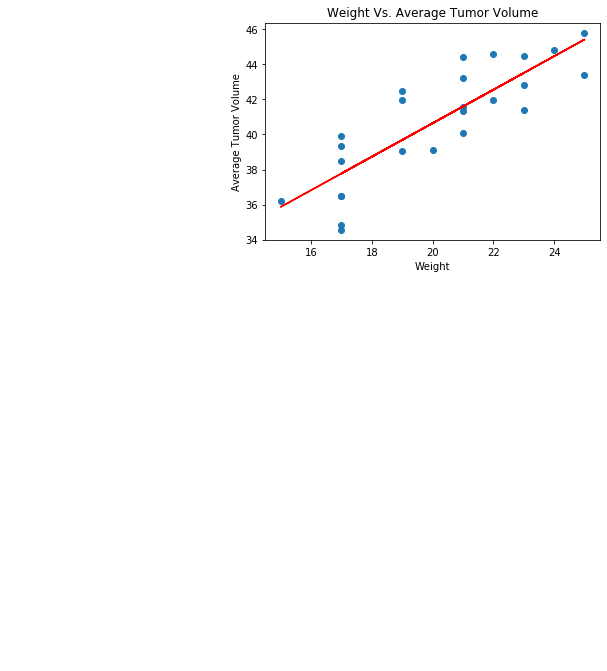

In [71]:
x_values = average_tumor['Weight (g)']
y_values = average_tumor['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Weight Vs. Average Tumor Volume")
print(f"The linear regression model has the equation {line_eq}")
print(f"The r-squared is: {rvalue**2}")
plt.show()